# Plotting in Python with Matplotlib (`plt`, `fig`, and `axs`)

This notebook teaches the basics of plotting with **Matplotlib**, focusing on:

- **Line plots** (the “normal” plot)
- **Scatter plots**
- **Bar plots**
- The common workflow using:

```python
fig, axs = plt.subplots(figsize=(4, 4))
```

> Note: `figsize` must be a **tuple** like `(width, height)`.  
> So it’s `figsize=(4, 4)` (with parentheses).

## 0. Running code cells

- Run a cell with **Shift + Enter**
- If you get an error like `NameError: name 'plt' is not defined`, it usually means you forgot to import Matplotlib.

In [1]:
# Run this cell first (Shift+Enter)

import numpy as np
import matplotlib.pyplot as plt

print("Matplotlib imported. You're ready to plot!")

Matplotlib imported. You're ready to plot!


## 1. The basic pattern: `fig` and `axs`

Think of it like this:

- `fig` = the *whole figure* (the canvas)
- `axs` (often called `ax`) = the *axes* where you draw the plot

Most beginner examples use `plt.plot(...)`, but **using `axs` is cleaner and scales better**.

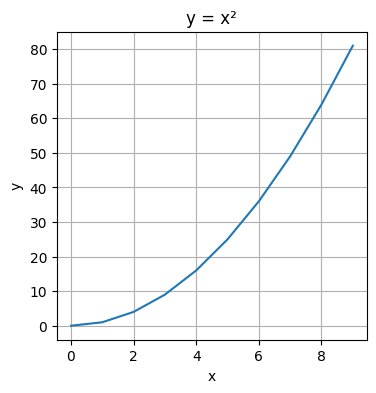

In [2]:
# A simple dataset
x = np.arange(0, 10)
y = x**2

# Core pattern (single plot)
fig, axs = plt.subplots(figsize=(4, 4))

axs.plot(x, y)                 # draw the line
axs.set_title("y = x²")        # title
axs.set_xlabel("x")            # x label
axs.set_ylabel("y")            # y label
axs.grid(True)                 # sets a grid

plt.show()

### Common mistake: forgetting the tuple in `figsize`

✅ Correct:
```python
fig, axs = plt.subplots(figsize=(4, 4))
```

❌ Incorrect:
```python
fig, axs = plt.subplots(figsize(4, 4))  # missing '='
fig, axs = plt.subplots(figsize=4, 4)   # not a tuple
```

## 2. Line plots: multiple lines + legend

Use multiple `axs.plot(...)` calls on the same axes.

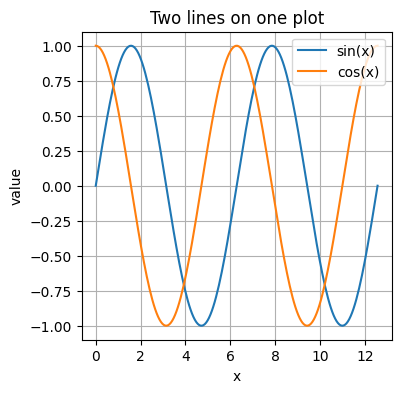

In [3]:
x = np.linspace(0, 4*np.pi, 200)

fig, axs = plt.subplots(figsize=(4, 4))

## Note that the label is in the line where I call the plot 

axs.plot(x, np.sin(x), label="sin(x)")     
axs.plot(x, np.cos(x), label="cos(x)")

axs.set_title("Two lines on one plot")
axs.set_xlabel("x")
axs.set_ylabel("value")
axs.legend()
axs.grid(True)

plt.show()

## 3. Scatter plots

Scatter is great when you have (x, y) points and want to see a pattern.

Use:
```python
axs.scatter(x, y)
```

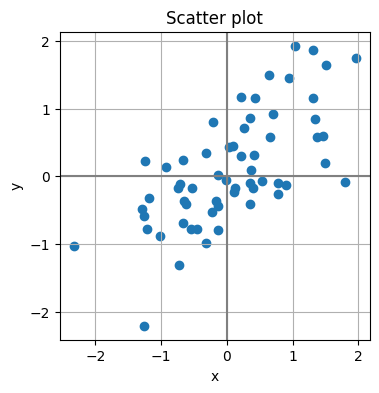

In [4]:
rng = np.random.default_rng(0)

x = rng.normal(loc=0, scale=1, size=60)
y = 0.7 * x + rng.normal(loc=0, scale=0.6, size=60)

fig, axs = plt.subplots(figsize=(4, 4))

axs.scatter(x, y)
axs.set_title("Scatter plot")
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.axhline(0,color="grey")   # horizontal line at y=0
axs.axvline(0,color="grey")   # vertical line at x=0
axs.grid(True)

plt.show()

### Scatter tip: transparency (`alpha`)

If points overlap a lot, add transparency:

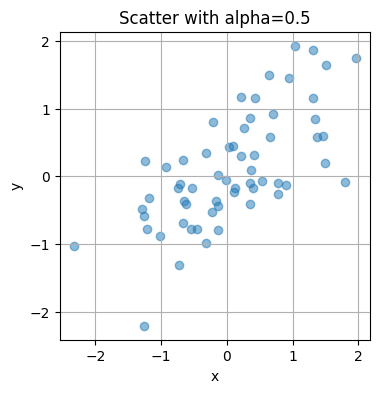

In [5]:
fig, axs = plt.subplots(figsize=(4, 4))

axs.scatter(x, y, alpha=0.5)
axs.set_title("Scatter with alpha=0.5")
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.grid(True)

plt.show()

## 4. Bar plots

Bar plots are useful for **categories** and **counts/values**.

Use:
```python
axs.bar(categories, values)
```

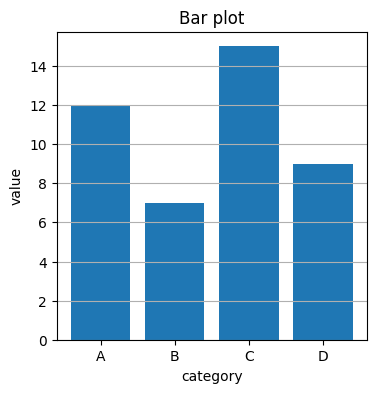

In [6]:
categories = ["A", "B", "C", "D"]
values = [12, 7, 15, 9]

fig, axs = plt.subplots(figsize=(4, 4))

axs.bar(categories, values)
axs.set_title("Bar plot")
axs.set_xlabel("category")
axs.set_ylabel("value")
axs.grid(True, axis="y")  # grid only on y

plt.show()

## 5. Subplots: more than one axes (`axs` becomes an array)

When you ask for multiple subplots, `axs` is usually an **array** of axes:

```python
fig, axs = plt.subplots(1, 2)
axs[0].plot(...)
axs[1].scatter(...)
```

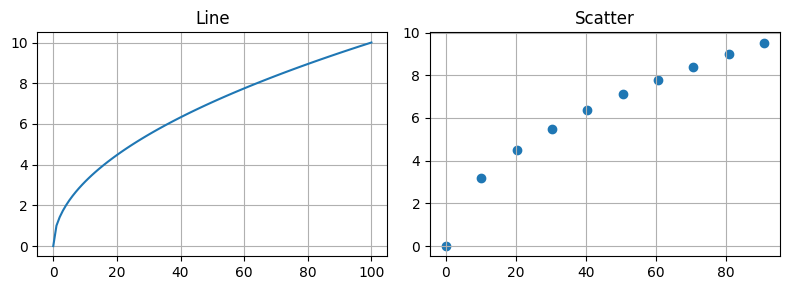

In [7]:
x = np.linspace(0, 100, 100)
y = np.sqrt(x)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns

# Left: line plot
axs[0].plot(x, y)
axs[0].set_title("Line")
axs[0].grid(True)

# Right: scatter plot
axs[1].scatter(x[::10], y[::10])
axs[1].set_title("Scatter")
axs[1].grid(True)

plt.tight_layout()  # helps spacing
plt.show()

### Mini rule of thumb

- **One plot** → `fig, axs = plt.subplots(...)` and use `axs.something(...)`
- **Multiple plots** → `axs[i]` or `axs[r, c]`

## 6. Subplots grid (2×2)

For a grid, you can index like `axs[row, col]`.

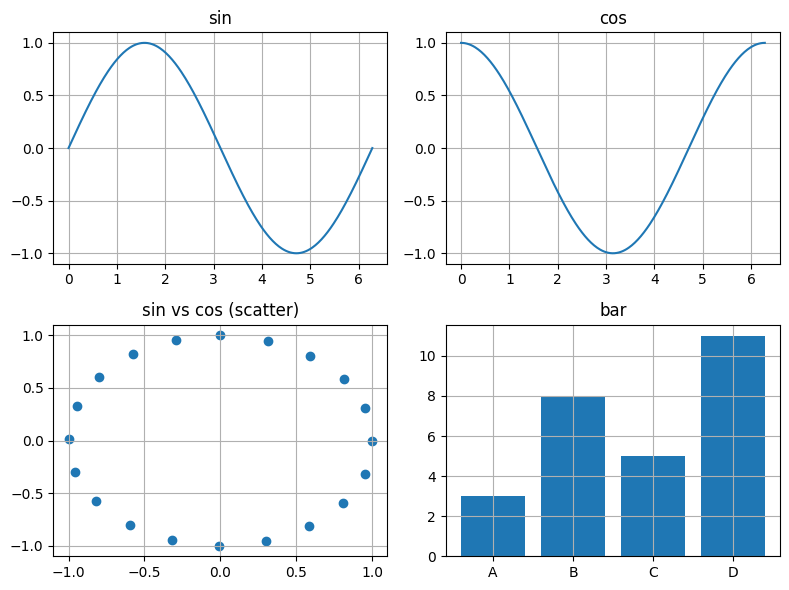

In [8]:
x = np.linspace(0, 2*np.pi, 300)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].plot(x, np.sin(x))
axs[0, 0].set_title("sin")

axs[0, 1].plot(x, np.cos(x))
axs[0, 1].set_title("cos")

axs[1, 0].scatter(np.sin(x[::15]), np.cos(x[::15]))
axs[1, 0].set_title("sin vs cos (scatter)")

cats = ["A", "B", "C", "D"]
vals = [3, 8, 5, 11]
axs[1, 1].bar(cats, vals)
axs[1, 1].set_title("bar")

for ax in axs.ravel():
    ax.grid(True)

plt.tight_layout()
plt.show()

## 7. A few useful `axs` methods (you’ll use these a lot)

- `axs.set_title("...")`
- `axs.set_xlabel("...")`, `axs.set_ylabel("...")`
- `axs.set_xlim(a, b)`, `axs.set_ylim(a, b)`
- `axs.grid(True)`
- `axs.legend()`
- `axs.axhline(y)`, `axs.axvline(x)`

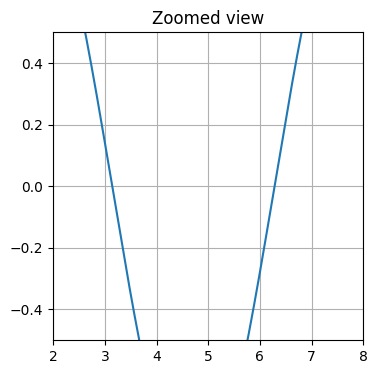

In [9]:
# Quick demo of x/y limits
x = np.linspace(0, 10, 300)
y = np.sin(x)

fig, axs = plt.subplots(figsize=(4, 4))
axs.plot(x, y)

axs.set_title("Zoomed view")
axs.set_xlim(2, 8)
axs.set_ylim(-0.5, 0.5)
axs.grid(True)

plt.show()

## Plotting logarithms 

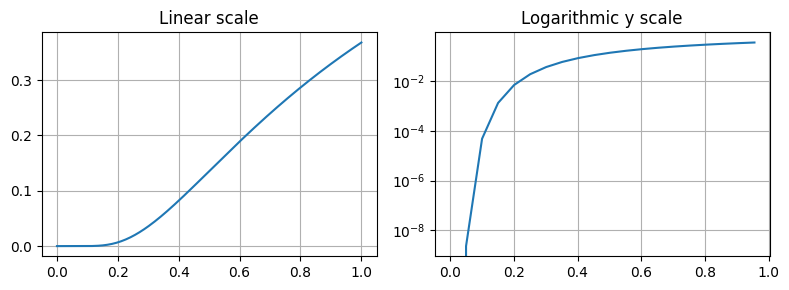

In [10]:
x = np.linspace(0.0001, 1, 200)
y = np.exp(-1/x)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns

# Left: line plot
axs[0].plot(x, y)
axs[0].set_title("Linear scale")
axs[0].grid(True)

# Right: scatter plot
axs[1].semilogy(x[::10], y[::10])
axs[1].set_title("Logarithmic y scale")
axs[1].grid(True)

plt.tight_layout()  # helps spacing
plt.show()

Lets see the case where we have a loglog scale. 

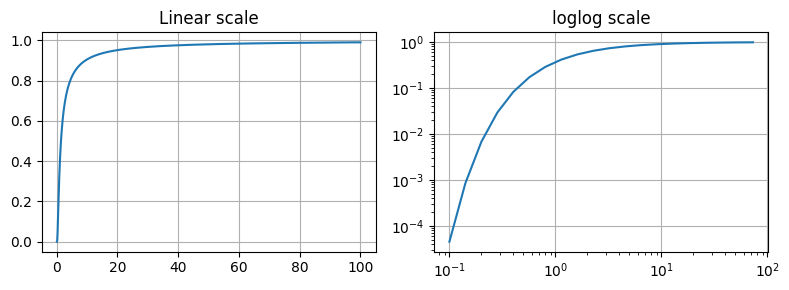

In [11]:
x = np.logspace(-1, 2, 200)
y = np.exp(-1/x)

fig, axs = plt.subplots(1, 2, figsize=(8, 3))  # 1 row, 2 columns

# Left: line plot
axs[0].plot(x, y)
axs[0].set_title("Linear scale")
axs[0].grid(True)

# Right: scatter plot
axs[1].loglog(x[::10], y[::10])
axs[1].set_title("loglog scale")
axs[1].grid(True)

plt.tight_layout()  # helps spacing
plt.show()

## 8. Saving figures

You can save your plot to a file:

```python
fig.savefig("my_plot.png", dpi=150, bbox_inches="tight")
```

In Jupyter, the file will appear in the same folder as your notebook (unless you give a path).

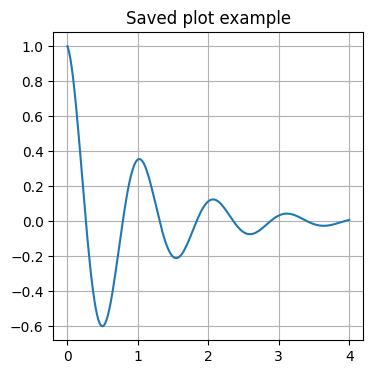

Saved: saved_plot_example.png


In [12]:
# Create and save a figure
x = np.linspace(0, 4, 200)
y = np.exp(-x) * np.cos(6*x)

fig, axs = plt.subplots(figsize=(4, 4))
axs.plot(x, y)
axs.set_title("Saved plot example")
axs.grid(True)

fig.savefig("saved_plot_example.png", dpi=150, bbox_inches="tight")
plt.show()

print("Saved: saved_plot_example.png")

## 9. Managing the plot configurations from the beginning

Lets say you are preparing some plots for a presentation or a manuscript. Therefore we would like to preserve certain fontsize and fontfamily for the rest of the fonts. The following lines help to set the plotting style from the begining 

In [13]:
import matplotlib
matplotlib.rc('font', family="Liberation Sans", size=14)  # controls default text sizes
matplotlib.rc('font', size= 12) # controls default text sizes
matplotlib.rc('axes', labelsize=12) # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=12) # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=12) # fontsize of the tick labels
matplotlib.rc('legend', fontsize= 10) # legend fontsize
matplotlib.rc('figure', titlesize=11) # fontsize of the figure title
# Set tick line width (i.e., tick size)
# matplotlib.rc('xtick.major', width=2)
# matplotlib.rc('ytick.major', width=2)
# matplotlib.rc('xtick.minor', width=2)
# matplotlib.rc('ytick.minor', width=2)
# matplotlib.rc('axes', linewidth=0.5)
matplotlib.rcParams['svg.fonttype'] = 'none'  # Keep text as text in SVG


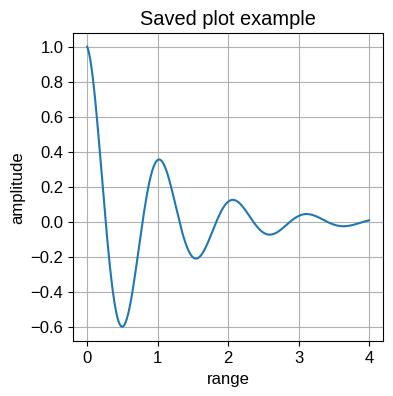

In [14]:
# Create and save a figure
x = np.linspace(0, 4, 200)
y = np.exp(-x) * np.cos(6*x)

fig, axs = plt.subplots(figsize=(4, 4))
axs.plot(x, y)
axs.set_xlabel("range")
axs.set_ylabel("amplitude")
axs.set_title("Saved plot example")
axs.grid(True)


## 9. Exercises (recommended)

Try these without looking back too much:

1. Make a **line plot** of `y = x³` for `x=0..5`.
2. Make a **scatter plot** of 100 random points and set `alpha=0.3`.
3. Make a **bar plot** of your top 5 favorite things with scores.
4. Make a **1×3 subplot** with (line, scatter, bar) next to each other.

In [15]:
# Exercise space 👇

# 1) y = x^3
# x = ...
# y = ...
# fig, axs = plt.subplots(figsize=(4, 4))
# axs.plot(x, y)
# plt.show()

# 2) random scatter (100 points)
# ...

# 3) bar plot (your categories)
# ...

# 4) 1x3 subplots
# ...